## Model Definition

In [25]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 2

def get_model():
    
    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [26]:
import pandas as pd
import numpy as np

concatenated_HO = pd.read_csv('concatenated_HumanObserved-Features-Data.csv')
subtracted_HO = pd.read_csv('subtracted_HumanObserved-Features-Data.csv')

X_concatenated_HO = concatenated_HO.iloc[:,2:20]
X_concatenated_HO = np.array(X_concatenated_HO.values)

Y_concatenated_HO = concatenated_HO.iloc[:,-1:]
Y_concatenated_HO = np.array(Y_concatenated_HO.values)
Y_concatenated_HO1 = to_categorical(Y_concatenated_HO)

X_subtracted_HO = subtracted_HO.iloc[:,2:11]
X_subtracted_HO = np.array(X_subtracted_HO.values)

Y_subtracted_HO = subtracted_HO.iloc[:,-1:]
Y_subtracted_HO = np.array(Y_subtracted_HO.values)
Y_subtracted_HO1 = to_categorical(Y_subtracted_HO)


# <font color='blue'>Creating Model</font>

In [27]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               9728      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
_________________________________________________________________
activation_10 (Activation)   (None, 2)                 0         
Total params: 10,754
Trainable params: 10,754
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [28]:
validation_data_split = 0.2
num_epochs = 100
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')



history = model.fit(X_concatenated_HO 
                    , Y_concatenated_HO1
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 1265 samples, validate on 317 samples
Epoch 1/100
1265/1265 [==============================] - 0s 137us/step - loss: 0.7498 - acc: 0.5130 - val_loss: 0.7052 - val_acc: 0.4984
Epoch 2/100
1265/1265 [==============================] - 0s 17us/step - loss: 0.7205 - acc: 0.5209 - val_loss: 0.7231 - val_acc: 0.4890
Epoch 3/100
1265/1265 [==============================] - 0s 16us/step - loss: 0.6967 - acc: 0.5621 - val_loss: 0.6998 - val_acc: 0.5142
Epoch 4/100
1265/1265 [==============================] - 0s 13us/step - loss: 0.6940 - acc: 0.5455 - val_loss: 0.6975 - val_acc: 0.5016
Epoch 5/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.7000 - acc: 0.5439 - val_loss: 0.7001 - val_acc: 0.5079
Epoch 6/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.6979 - acc: 0.5518 - val_loss: 0.6949 - val_acc: 0.5205
Epoch 7/100
1265/1265 [==============================] - 0s 19us/step - loss: 0.6970 - acc: 0.5415 - val_loss: 0.6973 - val_acc: 0.5237


1265/1265 [==============================] - 0s 12us/step - loss: 0.5604 - acc: 0.7154 - val_loss: 0.7660 - val_acc: 0.4984
Epoch 61/100
1265/1265 [==============================] - 0s 13us/step - loss: 0.5513 - acc: 0.7344 - val_loss: 0.7747 - val_acc: 0.5047
Epoch 62/100
1265/1265 [==============================] - 0s 13us/step - loss: 0.5464 - acc: 0.7289 - val_loss: 0.7586 - val_acc: 0.5079
Epoch 63/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.5521 - acc: 0.7304 - val_loss: 0.7614 - val_acc: 0.5268
Epoch 64/100
1265/1265 [==============================] - 0s 14us/step - loss: 0.5426 - acc: 0.7344 - val_loss: 0.7569 - val_acc: 0.5237
Epoch 65/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.5439 - acc: 0.7423 - val_loss: 0.7851 - val_acc: 0.4858
Epoch 66/100
1265/1265 [==============================] - 0s 12us/step - loss: 0.5355 - acc: 0.7383 - val_loss: 0.7811 - val_acc: 0.5174
Epoch 67/100
1265/1265 [==============================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb2f8e09e8>,
      dtype=object)

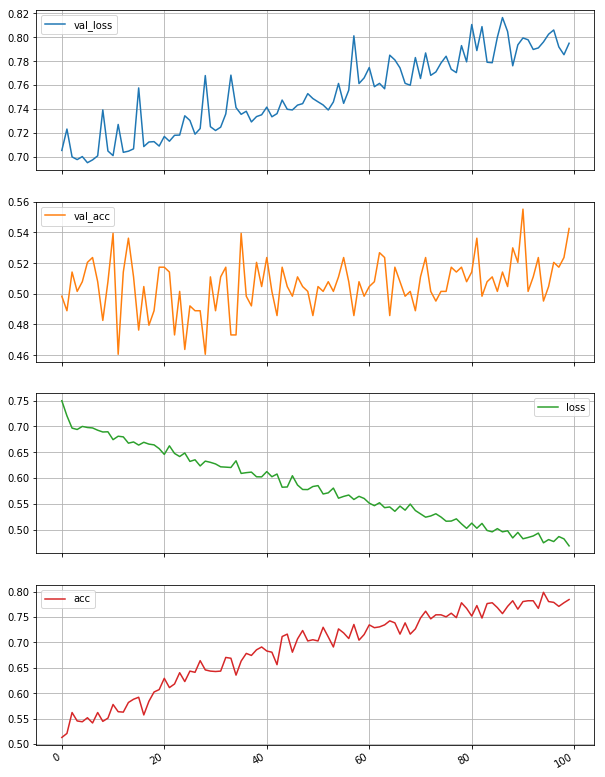

In [29]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))